<a href="https://www.kaggle.com/code/yutodennou/preprocessing-4-ways-of-tree-visualization?scriptVersionId=180157423" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

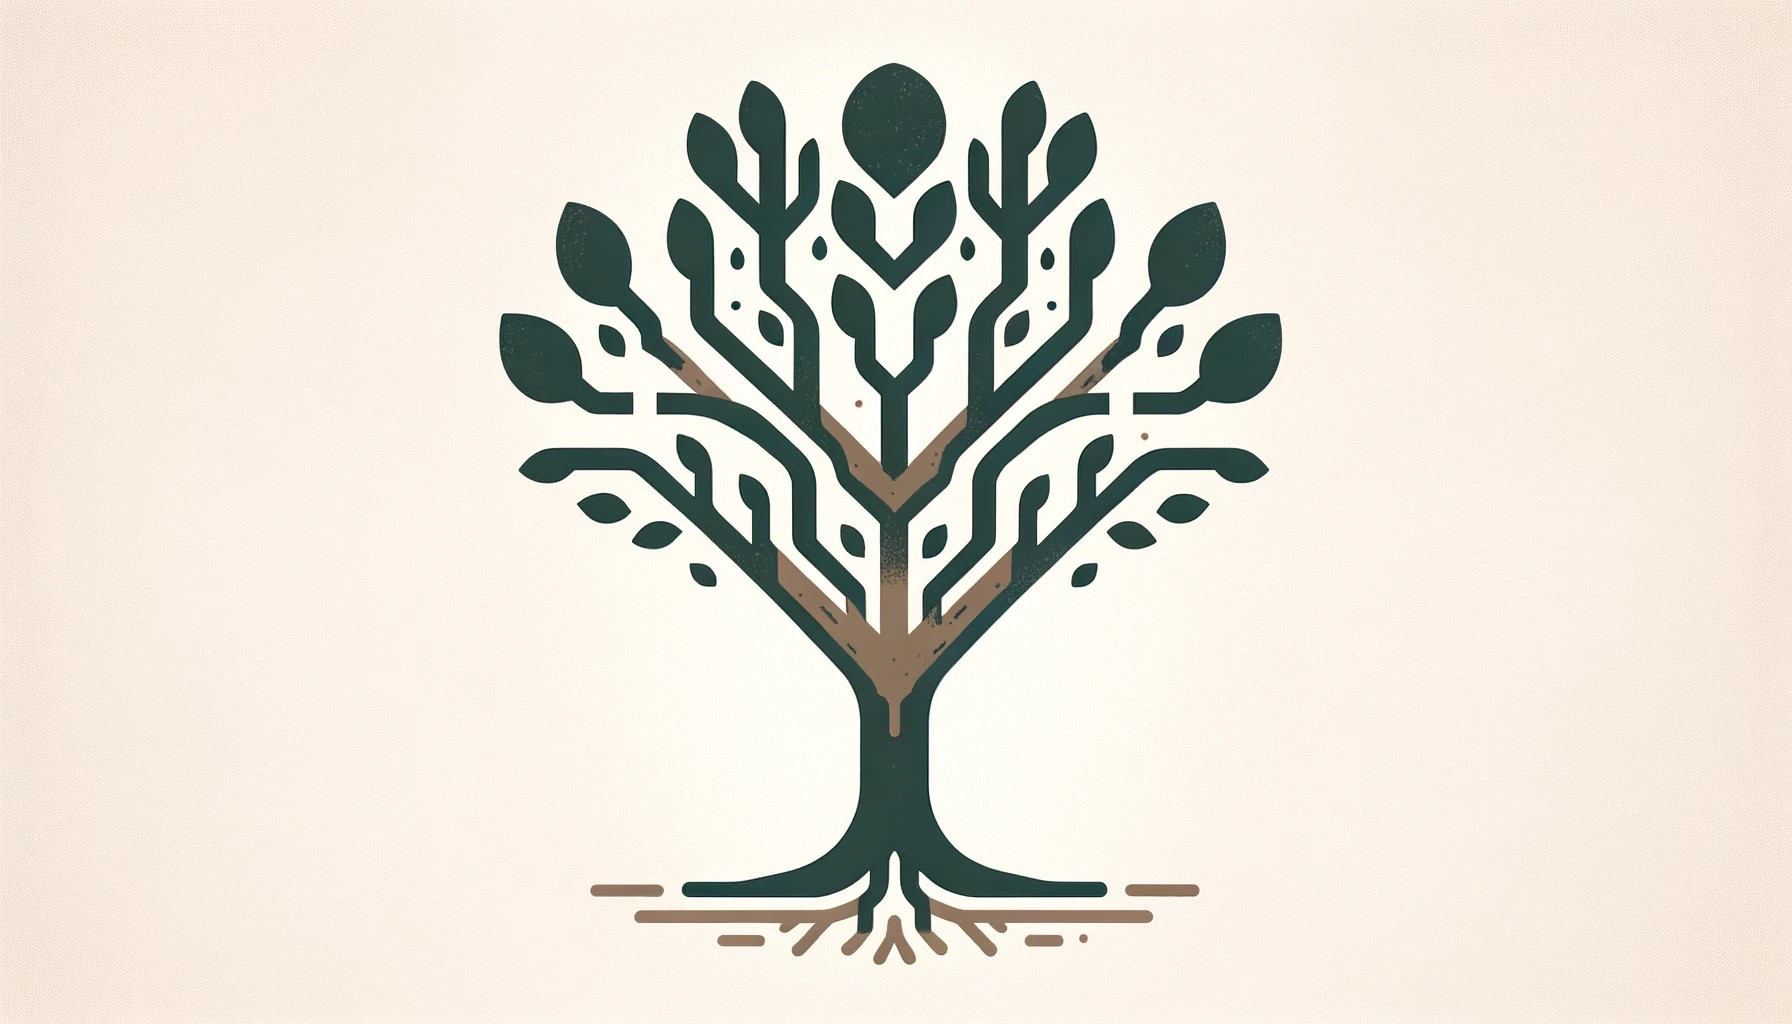

<a id="1"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34); background-color:rgb(255,255,255); "> <b> 1. Purpose🎉 </b></div>

**To show 4 ways of visualization of decision tree.
As a bonus, I explain how to use pipeline simply.**

<div style="background-color:#f0fae9; padding:6px 20px; border-radius:15px; font-size:20px">
    <br>
    <div style="font-weight:bold;font-size:24px;">💡Direction</div>
    <ul style="font-size:18px;">
      <li>Preparation for a sample Decision Tree model</li>
      <li>Visualize Trees</li>
    </ul>
</div>

<a id="2"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34); background-color:rgb(255,255,255); "> <b> 2. Preparation⚙️</b></div>


### 🌲Making simeple model of decision tree

In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler

In [2]:
# Read data
df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [3]:
# There are object and float types
df.dtypes, test.dtypes

(PassengerId      object
 HomePlanet       object
 CryoSleep        object
 Cabin            object
 Destination      object
 Age             float64
 VIP              object
 RoomService     float64
 FoodCourt       float64
 ShoppingMall    float64
 Spa             float64
 VRDeck          float64
 Name             object
 Transported        bool
 dtype: object,
 PassengerId      object
 HomePlanet       object
 CryoSleep        object
 Cabin            object
 Destination      object
 Age             float64
 VIP              object
 RoomService     float64
 FoodCourt       float64
 ShoppingMall    float64
 Spa             float64
 VRDeck          float64
 Name             object
 dtype: object)

In [4]:
# Also you can use select_dtypes() method
n_cols = df.loc[:,df.dtypes=='float'].columns
n_cols

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [5]:
# Also you can use select_dtypes() method
c_cols = df.loc[:,df.dtypes=='object'].columns
c_cols

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

In [6]:
# Make a simple dataset
target = 'Transported'
X = df.drop([target], axis=1)
X = X.drop(c_cols,axis=1)
X = X.fillna(X.mean())
y = df[target].astype(int)

In [7]:
feature_names = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf = DecisionTreeClassifier(max_depth=4,random_state=1234)
model= clf.fit(X_train, y_train)

<a id="3"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34); background-color:rgb(255,255,255); "> <b> 3. Visualize Methods🌟</b></div>


#### 🥟I introduce 4 methods of visualization for expressing tree structures!! 

<div style="background-color:#f0fae9; padding:6px 20px; border-radius:15px; font-weight:600;">
    <div>
        <ol style="font-size:18px;">
            <li>export_text</li>
            <li>plot_tree</li>
            <li>graphviz</li>
            <li>dtreeviz</li>
        </ol>
    </div>

## ☘Method 1 : Export Text

**That's really simple and easy way.**

In [8]:
from sklearn import tree
print(tree.export_text(model,feature_names=list(feature_names)))

|--- RoomService <= 0.50
|   |--- Spa <= 2.50
|   |   |--- VRDeck <= 332.00
|   |   |   |--- Age <= 12.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  12.50
|   |   |   |   |--- class: 1
|   |   |--- VRDeck >  332.00
|   |   |   |--- FoodCourt <= 3657.00
|   |   |   |   |--- class: 0
|   |   |   |--- FoodCourt >  3657.00
|   |   |   |   |--- class: 1
|   |--- Spa >  2.50
|   |   |--- FoodCourt <= 2507.50
|   |   |   |--- Spa <= 314.57
|   |   |   |   |--- class: 0
|   |   |   |--- Spa >  314.57
|   |   |   |   |--- class: 0
|   |   |--- FoodCourt >  2507.50
|   |   |   |--- Spa <= 2523.50
|   |   |   |   |--- class: 1
|   |   |   |--- Spa >  2523.50
|   |   |   |   |--- class: 0
|--- RoomService >  0.50
|   |--- RoomService <= 365.50
|   |   |--- Spa <= 422.50
|   |   |   |--- VRDeck <= 357.00
|   |   |   |   |--- class: 1
|   |   |   |--- VRDeck >  357.00
|   |   |   |   |--- class: 0
|   |   |--- Spa >  422.50
|   |   |   |--- Spa <= 2483.50
|   |   |   |   |--- class: 0
|  

## 🌴Method 2 : Plot Tree

**This is also easy to draw though difficult to refine layout from default**

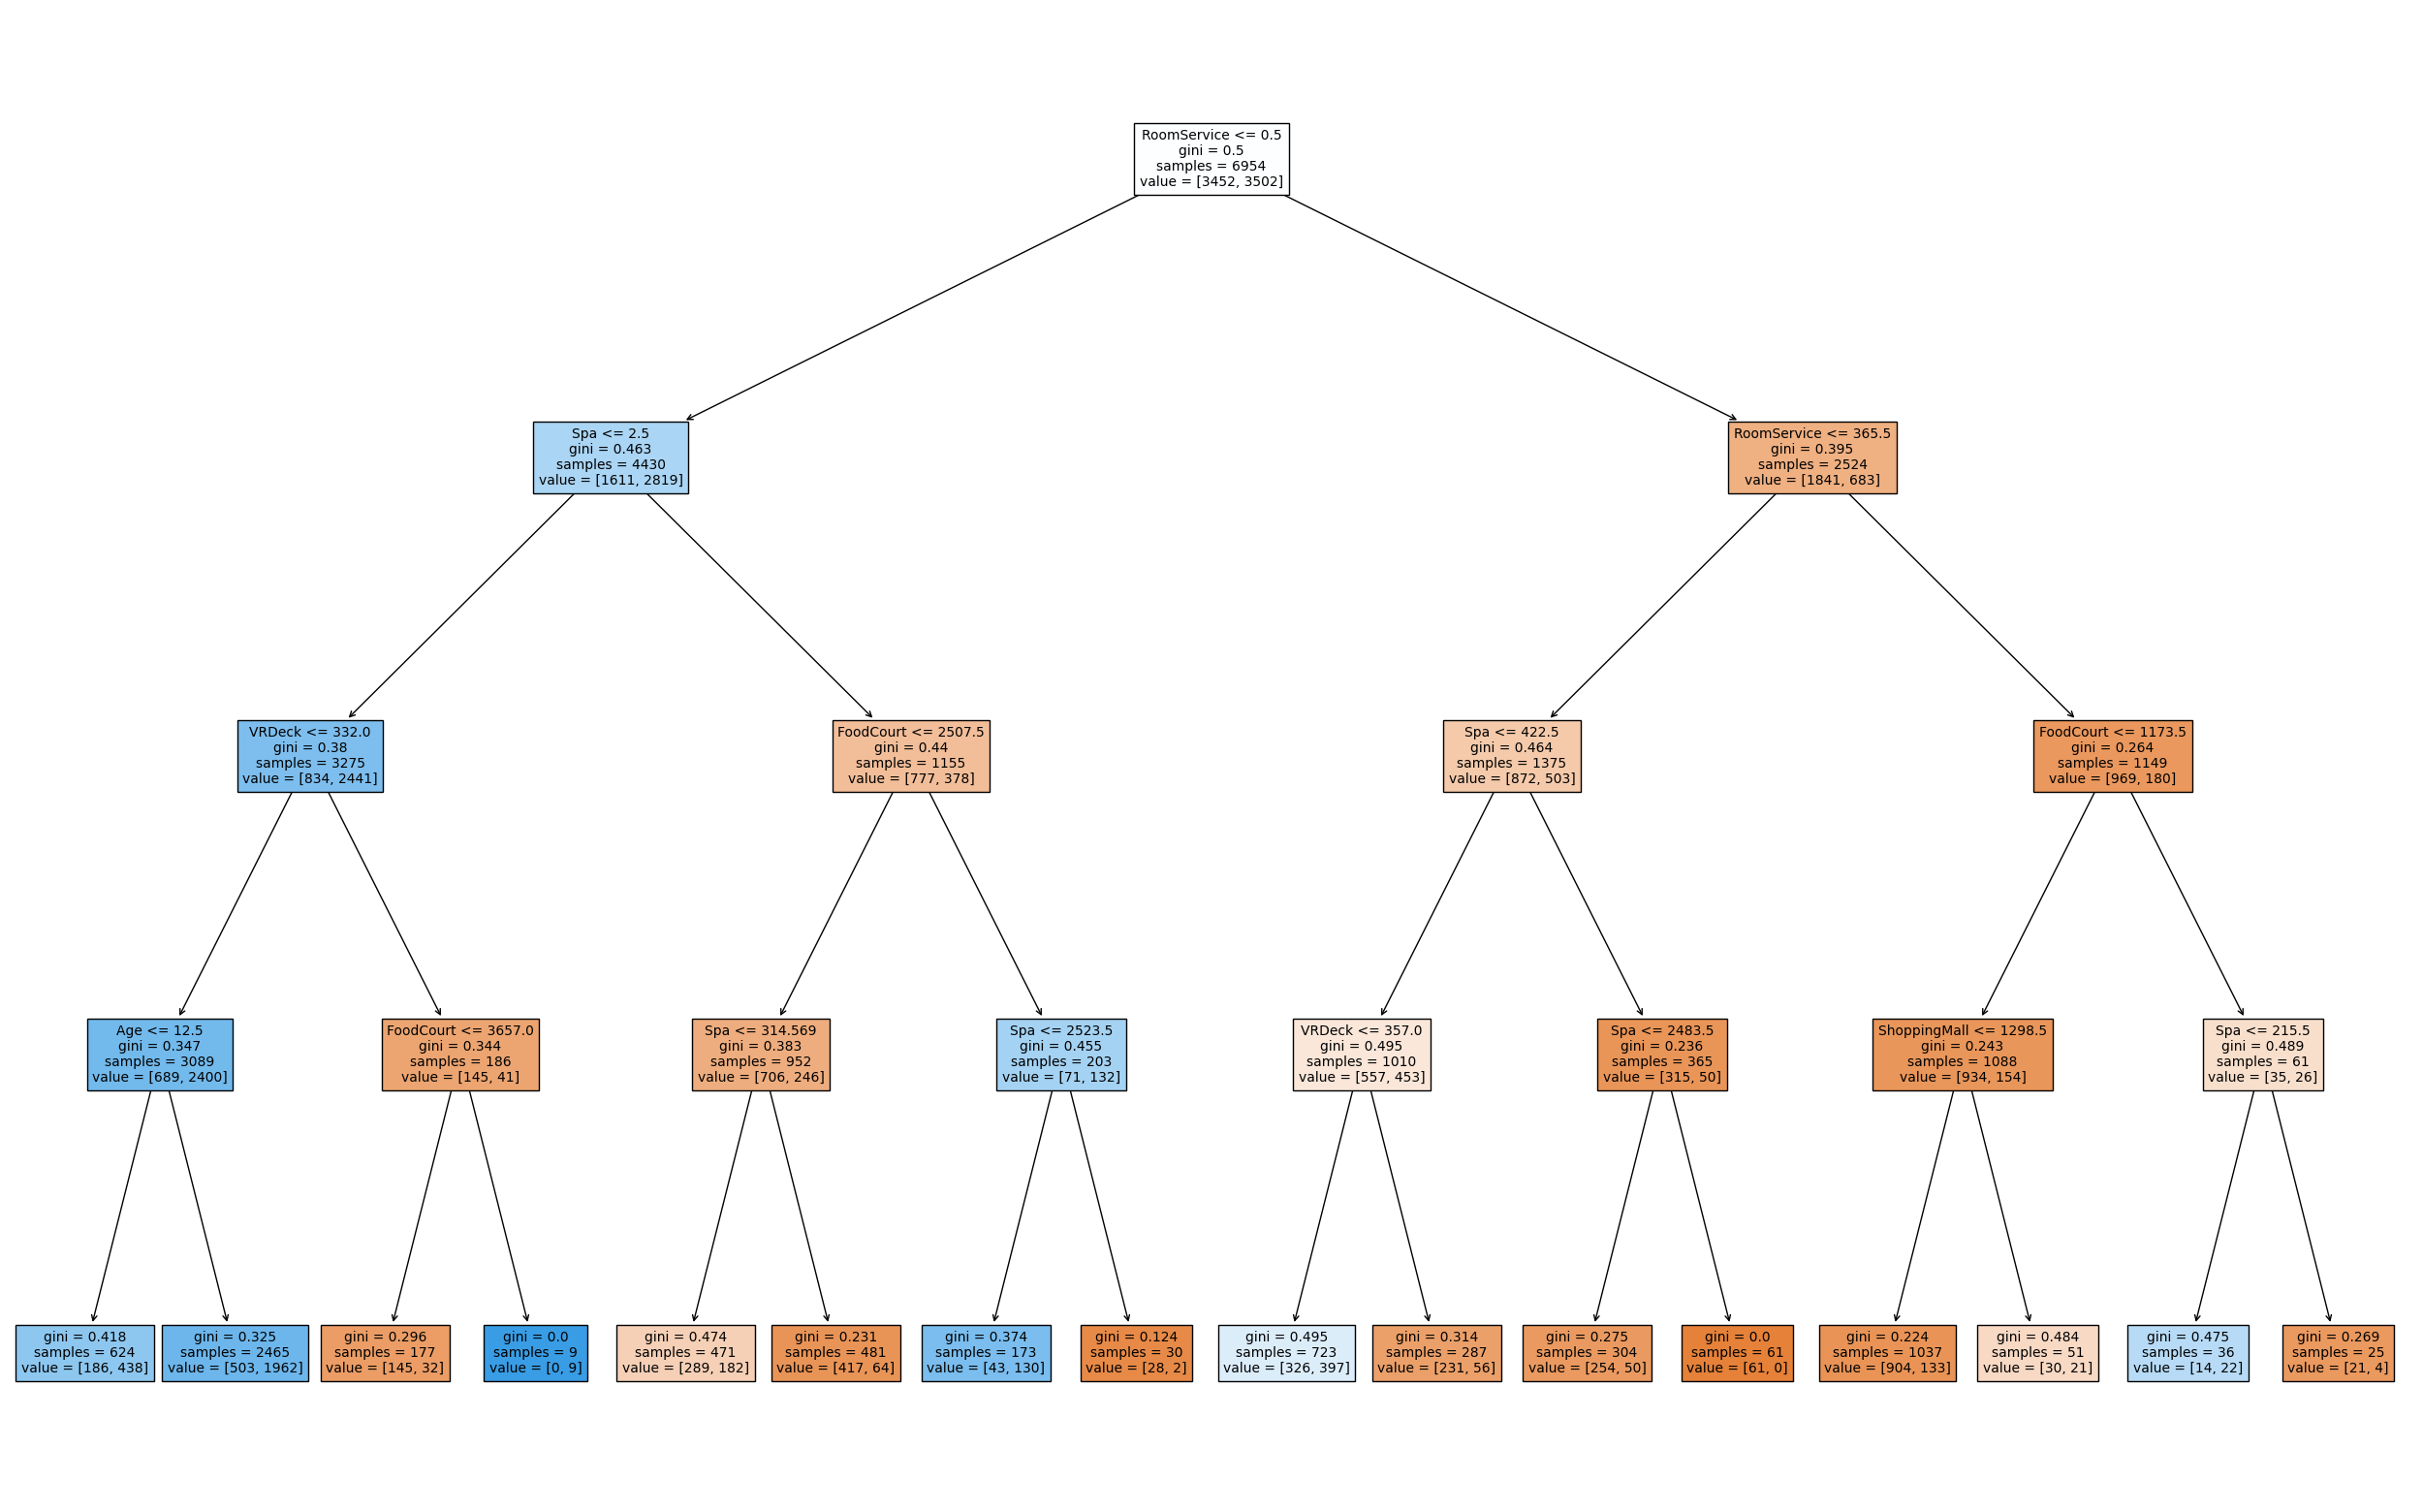

In [9]:
fig = plt.figure(figsize=(32,20))
_ = tree.plot_tree(model,feature_names=feature_names, fontsize=10,filled=True)

## 🌳Method 3 : Graphviz

**This is very popular way. Graph is larger than above technique.**

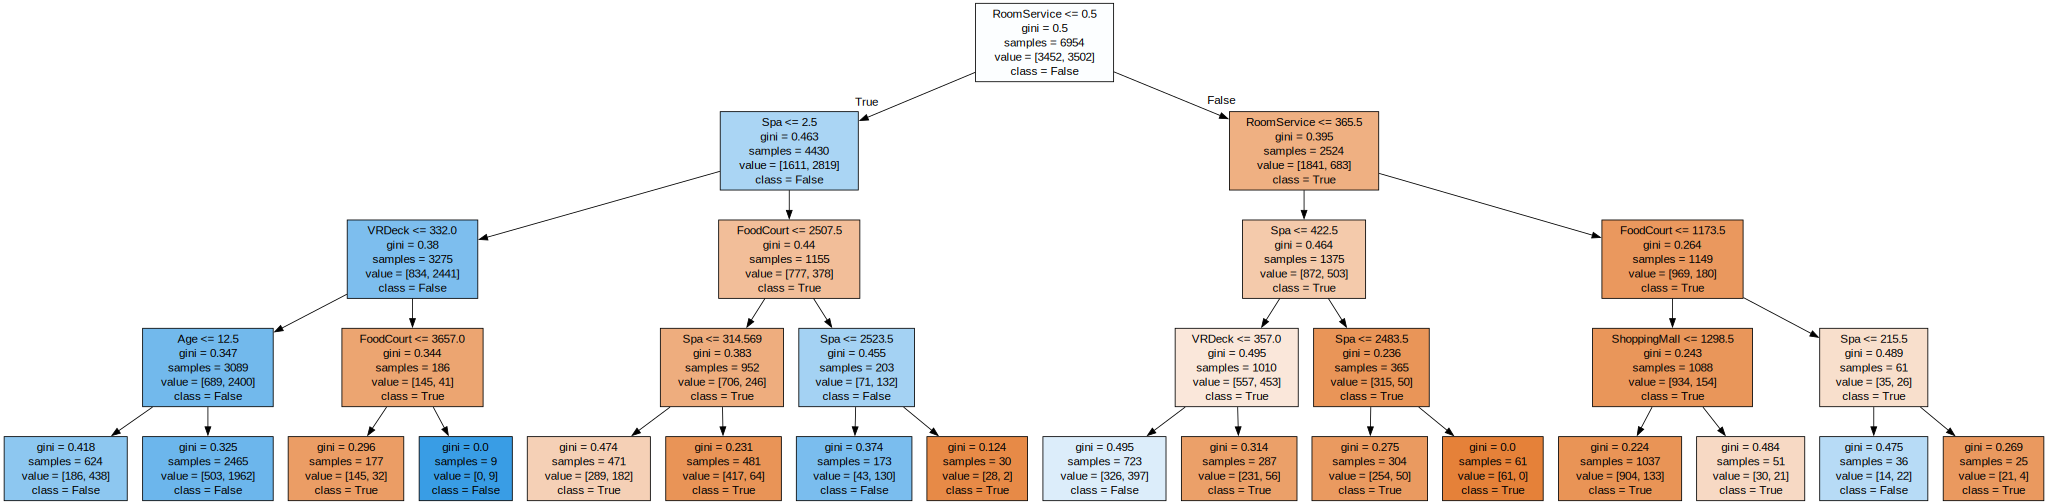

In [10]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=feature_names,  
                                class_names=['True','False'],
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

## 🌿Method 4 : dtreeviz

**This is very informative visualize. Additionally there are Pie graphs and histogram and it makes us evaluate appropriate branches.**

In [11]:
!pip install dtreeviz
import dtreeviz as dt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.2 MB/s eta 0:00:00


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


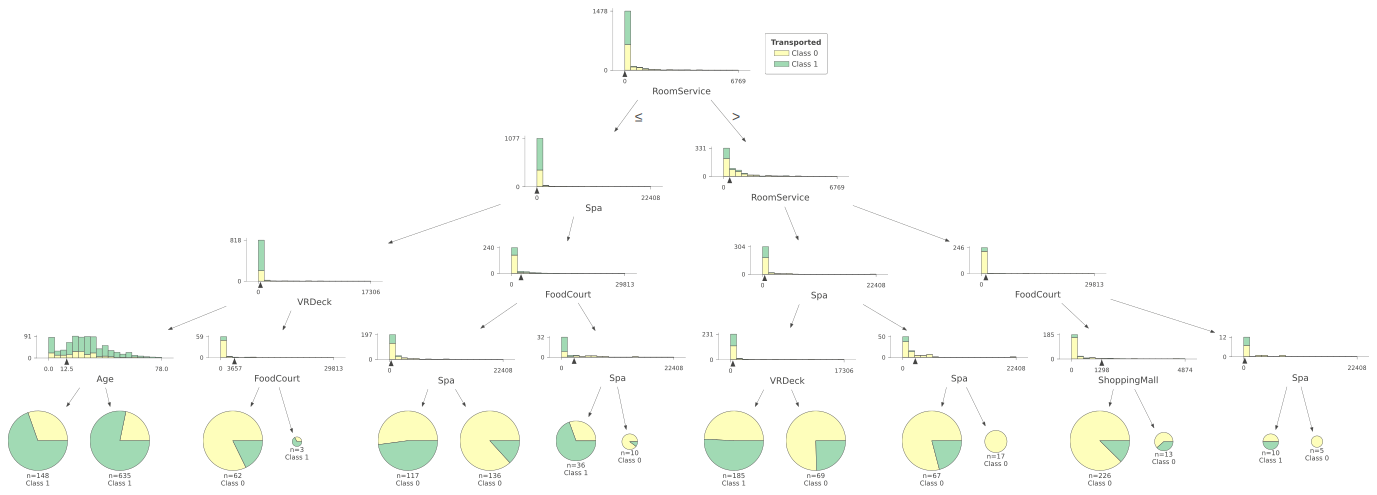

In [12]:
viz = dt.model(model,X_train=X_test, y_train=y_test,
                target_name="Transported",
                feature_names=list(feature_names))

viz.view()

<a id="4"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 0px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  border:#E57C23 solid; color:rgb(34, 34, 34); background-color: #FFFAF0; "> <b> 4. Summary🌟</b></div>

<div style="background-color:#fbf5e0; padding:12px 20px; border-radius:15px; font-size:20px">
    Dtreeviz can make very beautiful graphs for explaining tree structures. However care should be taken in the format of the data to be entered. If the tree is too large or memory is a concern, output in text might be a good choice!
</div>

**Thank you for reading!! Please follow my profiles!!**

[![Github](https://img.shields.io/badge/--FFFFFF?style=social&logo=github&label=Follow%20yutowac)](https://github.com/yutowac)


[![LinkedIn](https://img.shields.io/badge/--FFFFFF?style=social&logo=LinkedIn&label=Follow%20yutowac)](https://www.linkedin.com/in/wachi-yuto-b43ab3a2/)